In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import random
from sklearn.decomposition import PCA

In [2]:
from keras.datasets import cifar10

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11485488740009550009
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1745276110
locality {
  bus_id: 1
  links {
  }
}
incarnation: 142632252232714830
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


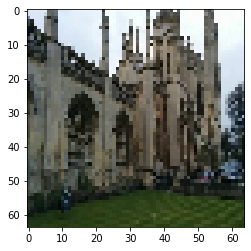

In [4]:
#importing dataset
import cv2
import os
import matplotlib.pyplot as plt


from keras.datasets import cifar100
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential, load_model
import os
import copy
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

import matplotlib.pyplot as plt

path=r'C:\Users\HAMROUA\Desktop\Aymen\KingsCollege\\'

all_images = []
imagename={}
import glob, os

#TimePreprocessing
sequences=['seq1','seq2','seq3','seq4','seq5','seq6','seq7','seq8']    
for sequence in sequences:
    os.chdir(path+sequence)
    for file in glob.glob("*.png"):
        img = cv2.imread(file , 1)
        img = cv2.resize(img,(64, 64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        all_images.append(img)
        imagename[sequence+'/'+file]=np.reshape(img, (1, 64, 64, 3)) / 255.

        
clusterpath=r'C:\Users\HAMROUA\Desktop\Aymen\Clusters\\'

import glob
arr = os.listdir(clusterpath)
clusterz={}
for i in range(0,len(arr)):
    os.chdir(clusterpath+'\\'+arr[i])
    seq = os.listdir(clusterpath+'\\'+arr[i])
    os.chdir(clusterpath+'\\'+arr[i]+'\\'+seq[0])
    for file in glob.glob("*.png"):
        clusterz[seq[0]+'/'+file]=arr[i]


def Loaddata(Nredundant):
    rows = []
    Y_test=[]
    Y_train=[]
    FinalData=[]
    with open(path+'dataset_features.csv') as f:
        for line in f:
            # strip whitespace
            line = line.strip()
            # separate the columns
            line = line.split(',')
            # save the line for use later
            rows.append(line)
    for i in range(0,len(rows)*4//5):
        image=imagename[rows[i][0]]
        Time=np.reshape([float(rows[i][1])]*64*Nredundant*3, ( 1,64, Nredundant, 3))
        X= np.reshape([float(rows[i][2])]*64*Nredundant*3, (1, 64, Nredundant, 3))
        Y= np.reshape([float(rows[i][3])]*64*Nredundant*3, (1,64, Nredundant, 3))
        Z= np.reshape([float(rows[i][4])]*64*Nredundant*3, (1,64, Nredundant, 3))
        W= np.reshape([float(rows[i][5])]*64*Nredundant*3, (1,64, Nredundant, 3))
        R= np.reshape([float(rows[i][6])]*64*Nredundant*3, (1,64, Nredundant, 3))

        Data= np.concatenate((image,Time,X,Y,Z,W,R), axis=2)
        FinalData.append(Data)
        Y_train.append(clusterz[rows[i][0]])

    X_train = np.reshape(FinalData, (len(FinalData), 64, Nredundant*6+64, 3))
    Y_train = np.reshape(Y_train, (len(Y_train), 1))

    FinalData=[]
    for i in range(len(rows)*4//5,len(rows)):
        image=imagename[rows[i][0]]
        Time=np.reshape([float(rows[i][1])]*64*Nredundant*3, ( 1,64, Nredundant, 3))
        X= np.reshape([float(rows[i][2])]*64*Nredundant*3, (1, 64, Nredundant, 3))
        Y= np.reshape([float(rows[i][3])]*64*Nredundant*3, (1,64, Nredundant, 3))
        Z= np.reshape([float(rows[i][4])]*64*Nredundant*3, (1,64, Nredundant, 3))
        W= np.reshape([float(rows[i][5])]*64*Nredundant*3, (1,64, Nredundant, 3))
        R= np.reshape([float(rows[i][6])]*64*Nredundant*3, (1,64, Nredundant, 3))

        Data= np.concatenate((image,Time,X,Y,Z,W,R), axis=2)
        FinalData.append(Data)
        Y_test.append(clusterz[rows[i][0]])

    X_test = np.reshape(FinalData, (len(FinalData), 64, Nredundant*6+64, 3))
    Y_test = np.reshape(Y_test, (len(Y_test), 1))
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    return X_train,X_test,Y_train,Y_test




In [4]:
print(rows[i][0])
clusterz


NameError: name 'rows' is not defined

In [5]:
print(Y_train)
print(X_train.shape)
print(X_test.shape)

NameError: name 'Y_train' is not defined

# Model Training

In [5]:
#Model
#encoder
def model(Nredundant):
    input_img = tf.keras.layers.Input(shape=(64, Nredundant*6+64, 3))

    encoder = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',kernel_initializer='he_normal')(input_img)
    encoder = tf.keras.layers.Activation('relu')(encoder)
    encoder = tf.keras.layers.BatchNormalization()(encoder)

    encoder = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.008))(encoder)
    encoder = tf.keras.layers.Activation('relu')(encoder)
    encoder = tf.keras.layers.BatchNormalization()(encoder)

    encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)(encoder)
    encoder = tf.keras.layers.Dropout(0.5)(encoder)

    encoder = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.008))(encoder)
    encoder = tf.keras.layers.Activation('relu')(encoder)
    encoder = tf.keras.layers.BatchNormalization()(encoder)

    encoder = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.008))(encoder)
    encoder = tf.keras.layers.Activation('relu')(encoder)
    encoder = tf.keras.layers.BatchNormalization()(encoder)

    encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)(encoder)
    encoder = tf.keras.layers.Dropout(0.5)(encoder)

    encoder = tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform')(encoder)
    encoder = tf.keras.layers.Activation('relu')(encoder)
    encoder = tf.keras.layers.BatchNormalization()(encoder)

    encoder = tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform')(encoder)
    encoder = tf.keras.layers.Activation('relu')(encoder)
    encoder = tf.keras.layers.BatchNormalization()(encoder)

    encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)(encoder)
    encoder = tf.keras.layers.Dropout(0.5)(encoder)

    encoder = tf.keras.layers.Flatten()(encoder)
    encoder = tf.keras.layers.Dense(256,activation='relu',kernel_initializer='he_uniform')(encoder)
    encoder_out = tf.keras.layers.Dense(256,activation='relu',kernel_initializer='he_uniform')(encoder)
    
    
    number=[]
    number.append(Nredundant*6+64)
    compute=Nredundant*6+64
    mini=(4+Nredundant//3)*1024//(4*256)
    while compute>mini:
        compute=compute//2
        number.append(compute)
    print(number)
    if number[-3]%2!=0:
        a1=3
    else:
        a1=2
    if number[-4]%2!=0:
        a2=3
    else:
        a2=2
    if number[-5]%2!=0:
        a3=3
    else:
        a3=2
    #decoder
    
    
    decoder_mul = tf.keras.layers.Dense(number[-2]*8*128)(encoder_out)
    decoder_reshape = tf.keras.layers.Reshape((8,number[-2],128))(decoder_mul)
    decoder = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(2,a1), strides=2, activation='relu', padding='valid')(decoder_reshape)
    decoder = tf.keras.layers.BatchNormalization()(decoder)
    decoder = tf.keras.layers.Dropout(0.5)(decoder)
    decoder = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(2,a2), strides=2, activation='relu', padding='valid')(decoder)
    decoder = tf.keras.layers.BatchNormalization()(decoder)
    decoder = tf.keras.layers.Dropout(0.5)(decoder)
    decoder = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(2,a3), strides=2, activation='relu', padding='valid')(decoder)
    decoder = tf.keras.layers.BatchNormalization()(decoder)
    decoder = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=(3,3), strides=1, activation=None, padding='same')(decoder)
    decoder = tf.keras.layers.Activation('sigmoid')(decoder)
    return input_img,encoder,decoder

In [6]:
Nredundant=5
input_img,encoder,decoder=model(Nredundant)
autoencoder = tf.keras.models.Model(input_img, decoder)
encoder = tf.keras.models.Model(input_img, encoder)
encoded_input = tf.keras.layers.Input(shape=(4, 4, 128))
decoder_layer = autoencoder.layers[-1]
decoder = tf.keras.models.Model(encoded_input,decoder_layer(encoded_input))
autoencoder.summary()


[94, 47, 23, 11, 5]
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 94, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 94, 32)        896       
                                                                 
 activation (Activation)     (None, 64, 94, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 94, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 94, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 64, 94, 32)        0         
                                         

In [8]:
print(X_test.shape)
print(X_train.shape)

NameError: name 'X_test' is not defined

In [7]:
Hist=[]
from tensorflow.keras.models import Model
from keras.models import load_model
from tensorflow.keras.models import Sequential, save_model


for  Nredundant in range(1,2,1):   
    X_train,X_test,Y_train,Y_test=Loaddata(Nredundant)
    input_img,encoder,decoder=model(Nredundant)
    autoencoder = tf.keras.models.Model(input_img, decoder)
    encoder = tf.keras.models.Model(input_img, encoder)
    encoded_input = tf.keras.layers.Input(shape=(4, 4, 128))
    decoder_layer = autoencoder.layers[-1]
    decoder = tf.keras.models.Model(encoded_input,decoder_layer(encoded_input))
    autoencoder.compile(loss='MeanSquaredError', optimizer='Adam')
    history = autoencoder.fit(X_train,X_train,validation_data=(X_test, X_test),batch_size=50,epochs=100)
    Hist.append(history)










[70, 35, 17, 8, 4]
Epoch 1/100
25/25 [==============================] - 15s 135ms/step - loss: 2.0768 - val_loss: 1.5788
Epoch 2/100
25/25 [==============================] - 1s 54ms/step - loss: 1.1407 - val_loss: 0.8690
Epoch 3/100
25/25 [==============================] - 1s 54ms/step - loss: 0.6394 - val_loss: 0.5341
Epoch 4/100
25/25 [==============================] - 1s 55ms/step - loss: 0.3707 - val_loss: 0.3173
Epoch 5/100
25/25 [==============================] - 1s 57ms/step - loss: 0.2243 - val_loss: 0.2117
Epoch 6/100
25/25 [==============================] - 1s 58ms/step - loss: 0.1439 - val_loss: 0.1629
Epoch 7/100
25/25 [==============================] - 1s 58ms/step - loss: 0.0993 - val_loss: 0.1357
Epoch 8/100
25/25 [==============================] - 1s 58ms/step - loss: 0.0747 - val_loss: 0.1094
Epoch 9/100
25/25 [==============================] - 1s 57ms/step - loss: 0.0615 - val_loss: 0.1039
Epoch 10/100
25/25 [==============================] - 1s 58ms/step - loss: 0.05

Epoch 82/100
25/25 [==============================] - 1s 57ms/step - loss: 0.0343 - val_loss: 0.0510
Epoch 83/100
25/25 [==============================] - 1s 57ms/step - loss: 0.0340 - val_loss: 0.0454
Epoch 84/100
25/25 [==============================] - 1s 60ms/step - loss: 0.0341 - val_loss: 0.0435
Epoch 85/100
25/25 [==============================] - 2s 64ms/step - loss: 0.0339 - val_loss: 0.0432
Epoch 86/100
25/25 [==============================] - 2s 66ms/step - loss: 0.0339 - val_loss: 0.0494
Epoch 87/100
25/25 [==============================] - 2s 78ms/step - loss: 0.0338 - val_loss: 0.0433
Epoch 88/100
25/25 [==============================] - 2s 62ms/step - loss: 0.0336 - val_loss: 0.0421
Epoch 89/100
25/25 [==============================] - 1s 56ms/step - loss: 0.0338 - val_loss: 0.0469
Epoch 90/100
25/25 [==============================] - 1s 57ms/step - loss: 0.0339 - val_loss: 0.0691
Epoch 91/100
25/25 [==============================] - 1s 56ms/step - loss: 0.0338 - val_los

In [ ]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

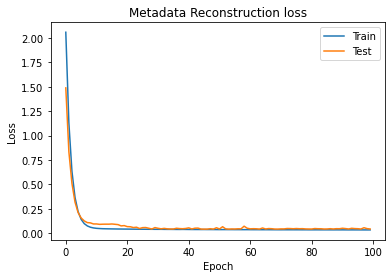

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metadata Reconstruction loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Image Clustering

Differance between images+attributes is: 11.769848167969048
(1560, 64, 70, 3)
Differance between attributes is: 0.0007643074480763424
Differance between images is: 0.0009621285006531284
Image before:
AxesImage(54,36;334.8x217.44)
(1560, 64, 70, 3)


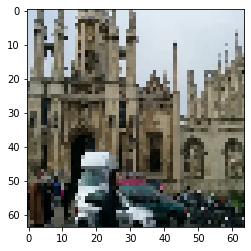

In [12]:
alldataset=np.concatenate((X_test, X_train), axis=0)

decoded_imgs=autoencoder.predict(alldataset)


print('Differance between images+attributes is:',sum(sum(sum(sum(abs(decoded_imgs-alldataset)))/(alldataset.shape[0]*alldataset.shape[1]*alldataset.shape[2]*alldataset.shape[3])))*100)

print(decoded_imgs.shape)
print('Differance between attributes is:',sum(sum(sum(sum(
    abs(decoded_imgs[:,0:64,65:88,:]-alldataset[:,0:64,65:88,:])
                        ))))/((int(alldataset.shape[0])*(88-65)*3*64)*100))


print('Differance between images is:',sum(sum(sum(sum(
    abs(decoded_imgs[:,0:64,0:64,:]-alldataset[:,0:64,0:64,:])
                        ))))/((int(alldataset.shape[0])*64*3*64)*100))
print('Image before:')
print(plt.imshow(X_train[150][0:64,0:64,:]))


print(alldataset.shape)


In [ ]:
print('Image after:')
print(plt.imshow(decoded_imgs[150][0:64,0:64,:]))
# pred=decoded_imgs.copy()
# pred.resize(10000,50)

In [ ]:
Model = tf.keras.models.Model(input_img,encoder_out)
alldataset_features = Model.predict(alldataset)  
print(alldataset_features.shape)

In [ ]:
def display_single_subplot(img, n_row, n_col, cell_num):
    ax = plt.subplot(n_row, n_col, cell_num)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

def get_sorted_similarity_idx(autoencoder, img_to_find_idx, dataset):
#     encoder.compile()
#     encoder.run_eagerly = True
    from keras.losses import binary_crossentropy
    from tensorflow.keras.losses import cosine_similarity   

    encoded_images=autoencoder.predict(alldataset)




    
    encoded_images = encoded_images.reshape(encoded_images.shape[0], -1)

    
    #initializing vars to pass into tensorflow
    X_selected = [encoded_images[img_to_find_idx].tolist() for _ in range(encoded_images.shape[0])]
    X_all = encoded_images.tolist()

    X_selected_tf = tf.Variable(X_selected, tf.float32)
    X_all_tf = tf.Variable(X_all, tf.float32)
    loss_tf_cross = binary_crossentropy(X_selected_tf, X_all_tf)
    loss_tf_cosine = cosine_similarity(X_selected_tf, X_all_tf)

    similarity_sorted_cross = np.argsort(np.array(loss_tf_cross))[1:]
    similarity_sorted_cosine = np.argsort(np.array(loss_tf_cosine))[1:]

     #the same figure appears in X_all too, so remove it
    return loss_tf_cross,similarity_sorted_cross,loss_tf_cosine,similarity_sorted_cosine

In [ ]:
img_to_find_idx=10
loss_tf_cross,similarity_sorted_cross,loss_tf_cosine,similarity_sorted_cosine=get_sorted_similarity_idx(autoencoder, img_to_find_idx, alldataset)



print(loss_tf_cross,max(loss_tf_cross),min(loss_tf_cross))
print(loss_tf_cosine,max(loss_tf_cosine),min(loss_tf_cosine))


In [ ]:
n=10
fig = plt.figure(figsize=(n*2, n/1.5))
plt.gray()
fig.suptitle('First row: original image. Second row: most similar images. Third row: least similar images')

img_shape = (64, 64, 3)

#display original
display_single_subplot(alldataset[img_to_find_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=1)
#display most similar
print('Similarity with Cross')
for i in range(n):
    similar_idx = similarity_sorted_cross[i]
    display_single_subplot(alldataset[similar_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=n+i+1)


In [ ]:
fig = plt.figure(figsize=(n*2, n/1.5))
plt.gray()
print('Similarity with Cosine')
#display original
display_single_subplot(alldataset[img_to_find_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=1)
for i in range(n):
    similar_idx = similarity_sorted_cosine[i]
    display_single_subplot(alldataset[similar_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=n+i+1)


In [ ]:
pca = PCA(n_components=0.99)
alldataset_features_afterPCA = pca.fit_transform(alldataset_features)
print('Features before PCA',alldataset_features.shape)
print('Features after PCA',alldataset_features_afterPCA.shape)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 1561)
 
for k in K:
    print('Iteration number: ',k)
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    clustered_images=kmeanModel.fit(alldataset_features_afterPCA)
 
    distortions.append(sum(np.min(cdist(alldataset_features_afterPCA, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / alldataset_features_afterPCA.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(alldataset_features_afterPCA, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / alldataset_features.shape[0]
    mapping2[k] = kmeanModel.inertia_
    

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortions')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
#K-means
ClusterNumbers=700
km=KMeans(n_clusters=ClusterNumbers,init='k-means++',max_iter=10000)
clustered_images = km.fit_predict(alldataset_features_afterPCA)

In [ ]:
Y_test=Y_test.astype(int)

for cluster in range(8):
    print('cluster: ', cluster)
    a = np.array(Y_test[np.where(clustered_images == cluster)])
    print(np.bincount(a[:,0]))
    print("Probable cluster label : ",np.argmax(np.bincount(a[:,0])))


In [ ]:
def get_sorted_similarity_idx(encoder, img_to_find_idx, dataset, loss='binary_crossentropy'):
    import matplotlib.pyplot as plt
    from keras.losses import binary_crossentropy
    from tensorflow.keras.losses import cosine_similarity 
    

#     encoder.compile()
#     encoder.run_eagerly = True
    encoded_images = encoder.predict(dataset)




    
    encoded_images = encoded_images.reshape(encoded_images.shape[0], -1)

    
    #initializing vars to pass into tensorflow
    X_selected = [encoded_images[img_to_find_idx].tolist() for _ in range(encoded_images.shape[0])]
    X_all = encoded_images.tolist()

    X_selected_tf = tf.Variable(X_selected, tf.float32)
    X_all_tf = tf.Variable(X_all, tf.float32)
    if loss=='binary_crossentropy':
        loss_tf = binary_crossentropy(X_selected_tf, X_all_tf)
    elif loss=='cosine_proximity':
        loss_tf = cosine_similarity(X_selected_tf, X_all_tf)
    else:
        print('Unknown loss, using binary_crossentropy.')
        loss_tf = binary_crossentropy(X_selected_tf, X_all_tf)
    init_op = tf.global_variables_initializer()

    similarity = []
    with tf.Session() as sess:
        sess.run(init_op)
        similarity = sess.run(loss_tf)
    similarity_sorted = np.argsort(np.array(similarity))[1:] #the same figure appears in X_all too, so remove it
    return similarity_sorted

In [ ]:

img_to_find_idx=10
get_sorted_similarity_idx(autoencoder, img_to_find_idx, alldataset, loss='binary_crossentropy')

In [ ]:
copy=clustered_images
decoded_imgs.shape
print(copy.shape)
print(X_test.shape)

In [ ]:
for i in range(ClusterNumbers):
    count = 0 
    print("Class ",i)
    indices = np.array(np.where(copy==i))
    print(len(indices[0]))
    n=len(indices[0])
    plt.figure(figsize=(20, 4))
    if not os.path.exists(path+'clusters\\'+str(i)):
        os.makedirs(path+'clusters\\'+str(i))
    for j in range(n):
        # display original
        pos = random.randint(0,np.size(indices))
        ax = plt.subplot(2, n,j + 1)
        plt.imshow(X_test[pos][0:64,0:64,:].reshape(64,64,3))
        cv2.imwrite(path+'clusters\\'+str(i)+'\image'+str(j)+'.jpg', np.array(X_test[pos][0:64,0:64,:]*[255]).reshape(64,64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, j + 1 + n)
        plt.imshow(decoded_imgs[pos][0:64,0:64,:].reshape(64,64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        count+=1
    plt.show()

The results of K-means is not really satisfactory. The images are more or less evenly distributed with no real majority in the cluster(>50% of the cluster size).There are a few classes that have not been represented.Perhaps using a more robust clustering algorithm for images might be needed.There is a major scope for improvement.

In [ ]:
# Plot the clusters

import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = principalComponents[clustered_images == 0]
filtered_label1 = principalComponents[clustered_images == 1]
filtered_label2 = principalComponents[clustered_images == 2]
filtered_label3 = principalComponents[clustered_images == 3]
filtered_label4 = principalComponents[clustered_images == 4]
filtered_label5 = principalComponents[clustered_images == 5]
filtered_label6 = principalComponents[clustered_images == 6]


#plotting the results

plt.scatter(km.cluster_centers_[:, 0], 
            km.cluster_centers_[:, 1], 
            s=100,                             # Set centroid size
            c='red')                           # Set centroid color


#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'blue')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'yellow')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'orange')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'cyan')
plt.scatter(filtered_label5[:,0] , filtered_label5[:,1] , color = 'green')
plt.scatter(filtered_label6[:,0] , filtered_label6[:,1] , color = 'pink')


plt.show()